### Analysis of Innings-wise Batsmen scores in International Cricket Matches
#### Data for the period of 41years: 21-Feb-1981 to 23-Jun-2022

### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Reading data from the file into a Dataframe

In [3]:
df = pd.read_csv('All_International_Cricket_Innings_Batsmen.csv')

In [4]:
# Displaying the first 5 records from the dataframe

df.head(5)

,Unnamed: 0,Player,Runs,Mins,BF,4s,6s,SR,Inns,Unnamed: 8,Opposition,Ground,Start Date
0,44,TWM Latham (NZ),0,5,6,0,0,0,1,NaN,Test v England,Leeds,23-Jun-22
1,45,WA Young (NZ),20,57,42,2,0,47.61,1,NaN,Test v England,Leeds,23-Jun-22
2,46,KS Williamson (NZ),31,97,64,5,0,48.43,1,NaN,Test v England,Leeds,23-Jun-22
3,47,DP Conway (NZ),26,100,62,5,0,41.93,1,NaN,Test v England,Leeds,23-Jun-22
4,48,HM Nicholls (NZ),19,137,99,1,0,19.19,1,NaN,Test v England,Leeds,23-Jun-22


In [5]:
# Displaying the last 5 records from the dataframe

df.tail(5)

,Unnamed: 0,Player,Runs,Mins,BF,4s,6s,SR,Inns,Unnamed: 8,Opposition,Ground,Start Date
192342,186,SMH Kirmani (INDIA),11,50,36,1,0,30.55,4,NaN,Test v New Zealand,Wellington,21-Feb-81
192343,187,N Kapil Dev (INDIA),9,36,26,1,0,34.61,4,NaN,Test v New Zealand,Wellington,21-Feb-81
192344,188,RMH Binny (INDIA),26*,111,86,2,0,30.23,4,NaN,Test v New Zealand,Wellington,21-Feb-81
192345,189,RJ Shastri (INDIA),19,70,54,3,0,35.18,4,NaN,Test v New Zealand,Wellington,21-Feb-81
192346,190,B Yograj Singh (INDIA),6,37,28,1,0,21.42,4,NaN,Test v New Zealand,Wellington,21-Feb-81


## Description of data represented by the columns in the dataset:
##### 1. Player (Team) - Name of the player and the team that the player represents
##### 2. Runs - The runs scored by the player in the innings of that particular match
##### 3. Mins - The number of minutes player was at the crease (ground )
##### 4. BF - Number of balls faced by the Player during that innings
##### 5. 4s - Number of fours hit by the player in that innings
##### 6. 6s - Number of six hit by the player in that innings
##### 7. SR - Strike Rate of the player in the corresponding innings. Strike rate is the number of runs scored per 100 balls faced.
##### 8. Inns - The inning of the match in which the batsmen scored these runs. Test matches consist of 4 innings while ODI & T20I have 2 innings.
##### 9. Opposition - This column mentions the format of the match (Test, ODI, T20I) and name of the Opponent Team.
##### 10. Ground - Name of the ground/stadium where the match was played.

In [6]:
# Checking the shape of the dataframe

df.shape

(192347, 13)

In [ ]:
# Checking the total number of NULL values in each column

df.isnull().sum()

Unnamed: 0         0
Player             0
Runs               0
Mins               0
BF                 0
4s                 0
6s                 0
SR                 0
Inns               0
Unnamed: 8    192347
Opposition         0
Ground             0
Start Date         0
dtype: int64

In [ ]:
# The aboove output shows that none of the columns, except "Unnamed: 8", has NULL values.
# Infact "Unnamed: 8" column does not have any values.
# So, dropping that column as it would not be helpful for any analysis.

In [7]:
df.drop(labels=['Unnamed: 0','Unnamed: 8'],axis=1,inplace=True)

In [8]:
#Checking for number of duplicate values

df.duplicated().sum()

37

In [ ]:
# There are total 37 duplicate values in the data.
# Dropping the duplicate values to avoid redundancy.

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.head(5)

,Player,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date
0,TWM Latham (NZ),0,5,6,0,0,0,1,Test v England,Leeds,23-Jun-22
1,WA Young (NZ),20,57,42,2,0,47.61,1,Test v England,Leeds,23-Jun-22
2,KS Williamson (NZ),31,97,64,5,0,48.43,1,Test v England,Leeds,23-Jun-22
3,DP Conway (NZ),26,100,62,5,0,41.93,1,Test v England,Leeds,23-Jun-22
4,HM Nicholls (NZ),19,137,99,1,0,19.19,1,Test v England,Leeds,23-Jun-22


### The "Player" column has 2 values for each record - Player name and Team/Country.
#### Extracting both the values in 2 separate columns.
#### This would be helpful for better analysis.

In [11]:
 df['Player'].sample(9)

91134           I Sharma (INDIA)
106270         LE Plunkett (ENG)
56723           BMAJ Mendis (SL)
127769           GP Thorpe (ENG)
182193          Zakir Khan (PAK)
33073     Mohammed Shami (INDIA)
100248     Shakib Al Hasan (BAN)
127280              M Ntini (SA)
174314          MD Marshall (WI)
Name: Player, dtype: object

In [12]:
import re
df['Player']=df['Player'].replace(to_replace='\(\d+\)',value='',regex=True)

In [13]:
df['Player']

0                TWM Latham (NZ)
1                  WA Young (NZ)
2             KS Williamson (NZ)
3                 DP Conway (NZ)
4               HM Nicholls (NZ)
                   ...          
192342       SMH Kirmani (INDIA)
192343       N Kapil Dev (INDIA)
192344         RMH Binny (INDIA)
192345        RJ Shastri (INDIA)
192346    B Yograj Singh (INDIA)
Name: Player, Length: 192310, dtype: object

In [14]:
df['Player']=df['Player'].replace(to_replace='\(\d+\)',value='',regex=True)

In [15]:
df['Player_Name']=df['Player'].str.split('(',expand=True)[0]

In [16]:
df['Team']=df['Player'].str.split('(',expand=True)[1]

In [17]:
df['Team']=df['Team'].str.split(')',expand=True)[0]

In [18]:
df['Player_Name']=df['Player_Name'].str.strip()

In [19]:
# Now, dropping the "Player" column, as 2 separate columns have been created for the same data.

df.drop(labels='Player',axis=1,inplace=True)

In [20]:
df.head(2)

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,Player_Name,Team
0,0,5,6,0,0,0,1,Test v England,Leeds,23-Jun-22,TWM Latham,NZ
1,20,57,42,2,0,47.61,1,Test v England,Leeds,23-Jun-22,WA Young,NZ


Now analysing the "Runs" column of the dataset to represent its data in a clear way.

In [23]:
df['Runs'].sample(10)

7189       24
114736     77
56513      44
122707     33
72545       0
65444      10
19581       6
187143    DNB
163876      2
80805       2
Name: Runs, dtype: object

If value in the "Runs" column is followed by "*" - this means that the batsmen was Not Out in that innings. </br>


In [24]:
df['wicket']=['not out' if '*' in i else 'out' for i in df.Runs]

In [25]:
df.head(2)

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,Player_Name,Team,wicket
0,0,5,6,0,0,0,1,Test v England,Leeds,23-Jun-22,TWM Latham,NZ,out
1,20,57,42,2,0,47.61,1,Test v England,Leeds,23-Jun-22,WA Young,NZ,out


In [26]:
df['Runs']=df['Runs'].str.replace('*',' ')

In [27]:
df['Runs']=df['Runs'].str.strip()

In [28]:
df['Score']=['runs' if i.isdigit() else i for  i in df.Runs]

In [29]:
df.head(2)

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,Player_Name,Team,wicket,Score
0,0,5,6,0,0,0,1,Test v England,Leeds,23-Jun-22,TWM Latham,NZ,out,runs
1,20,57,42,2,0,47.61,1,Test v England,Leeds,23-Jun-22,WA Young,NZ,out,runs


In [30]:
df['Score'].value_counts().index

Index(['runs', 'DNB', 'TDNB', 'sub', 'absent'], dtype='object')

<b>DNB (Did Not Bat) -</b> This means that the batsmen did not get to bat in the corresponding innings.<br><br>
<b>TDNB (Team Did Not Bat) -</b> This means that the entire team did not bat in the corresponding innings.<br><br>
<b>sub (Substitue) -</b> The playing 11 are declared by the team at the start of the match. And then during the match, if a player has been injured or becomes ill, then the Umpires allow a Substitute/replacement player with the applicable playing rules. The player is allowed resume playing after recovery.<br><br>
<b>Absent -</b> After announcing the playing 11, if a batsman is not able to come to the pitch to bat even without facing a ball, due to prior illness or injury, then player is marked as absent. 

In [31]:
df1=df[(df['Score']=='DNB') | (df['Score']=='TDNB') | (df['Score']=='sub') | (df['Score']=='absent')]

In [32]:
dic={'DNB':0, 'TDNB':0, 'sub':0, 'absent':0}

In [33]:
df['Runs'].replace(dic,inplace=True)

In [34]:
df.drop(index=df1.index,axis=0,inplace=True)

In [35]:
df1.replace('-',0,inplace=True)

In [36]:
df.shape,df1.shape

((156160, 14), (36150, 14))

In [37]:
final_df=pd.concat([df,df1],ignore_index=True)

In [38]:
final_df['Runs'].replace(dic,inplace=True)

In [39]:
final_df.head(2)

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,Player_Name,Team,wicket,Score
0,0,5,6,0,0,0,1,Test v England,Leeds,23-Jun-22,TWM Latham,NZ,out,runs
1,20,57,42,2,0,47.61,1,Test v England,Leeds,23-Jun-22,WA Young,NZ,out,runs


In [40]:
final_df['Runs']=final_df['Runs'].astype(int)

In [41]:
# Creating new column "situation_of_player" from wicket and score
final_df['situation_of_player']=np.where(final_df['wicket']=='out',np.where(final_df['Score']=='runs','out',final_df['Score']),
        np.where(final_df['Score']=='runs','not out',final_df['Score']))

In [42]:
final_df.drop(labels=['wicket','Score'],axis=1,inplace=True)

In [43]:
final_df['situation_of_player'].value_counts()

out        129562
DNB         34293
not out     26598
TDNB         1562
sub           172
absent        123
Name: situation_of_player, dtype: int64

#### "Opposition" column in the dataset consists of 2 values for each record - Format of the match and Opponent Team.<br><br>
#### So splitting the column into 2 columns - <b>Format</b> and <b>Opponent Team</b>

In [47]:
final_df['Format']=final_df['Opposition'].str.split(' v ',expand=True)[0]

In [48]:
final_df['Opponent Team']=final_df['Opposition'].str.split(' v ',expand=True)[1]

In [49]:
final_df.shape

(192310, 15)

In [50]:
final_df.drop(labels=['Opposition'],axis=1,inplace=True)

In [51]:
final_df.head(2)

,Runs,Mins,BF,4s,6s,SR,Inns,Ground,Start Date,Player_Name,Team,situation_of_player,Format,Opponent Team
0,0,5,6,0,0,0,1,Leeds,23-Jun-22,TWM Latham,NZ,out,Test,England
1,20,57,42,2,0,47.61,1,Leeds,23-Jun-22,WA Young,NZ,out,Test,England


#### Ground - Number of matches played on each ground

In [52]:
final_df['Ground'].value_counts()

Sharjah       6281
Harare        5879
Sydney        5231
Melbourne     5027
Mirpur        4698
              ... 
Berri           22
Albury          22
Vijayawada      22
Nairobi         22
Swansea         22
Name: Ground, Length: 224, dtype: int64

#### Start Date - Splitting this column into 3 - year, Day and month

In [53]:
time=pd.DatetimeIndex(final_df['Start Date'])

In [54]:
final_df['year']=time.year

In [55]:
final_df['Day']=time.day_name()

In [56]:
final_df['month']=time.month_name()

In [57]:
final_df.drop(labels='Start Date',axis=1,inplace=True)

#### Adding more calculated columns in this dataset for further analysis

In [58]:
final_df.head(5)

,Runs,Mins,BF,4s,6s,SR,Inns,Ground,Player_Name,Team,situation_of_player,Format,Opponent Team,year,Day,month
0,0,5,6,0,0,0,1,Leeds,TWM Latham,NZ,out,Test,England,2022,Thursday,June
1,20,57,42,2,0,47.61,1,Leeds,WA Young,NZ,out,Test,England,2022,Thursday,June
2,31,97,64,5,0,48.43,1,Leeds,KS Williamson,NZ,out,Test,England,2022,Thursday,June
3,26,100,62,5,0,41.93,1,Leeds,DP Conway,NZ,out,Test,England,2022,Thursday,June
4,19,137,99,1,0,19.19,1,Leeds,HM Nicholls,NZ,out,Test,England,2022,Thursday,June


In [59]:
g = final_df.groupby('Player_Name')['year'].unique().reset_index()
g['Total_Years_Played'] = [len(i) for i in g['year']]
g['stop']=[max(i) for i in g['year']]
g['start']=[min(i) for i in g['year']]

In [60]:
g.head(3)

,Player_Name,year,Total_Years_Played,stop,start
0,A Ahmadhel,"[2021, 2020, 2019]",3,2021,2019
1,A Andrews,"[2022, 2021]",2,2022,2021
2,A Anemogiannis,[2019],1,2019,2019


#### Using the start and stop columns to define a new column "Span" which will show the total span of years for which the player has played

In [61]:
g['span']=g['start'].astype('str')+'-'+g['stop'].astype('str')

In [62]:
g.drop(labels=['year','stop','start'],axis=1,inplace=True)
final_df.shape,g.shape

((192310, 16), (4304, 3))

In [63]:
g.head(2)

,Player_Name,Total_Years_Played,span
0,A Ahmadhel,3,2019-2021
1,A Andrews,2,2021-2022


In [64]:
final_df=final_df.merge(g,on='Player_Name')

# Final Dataset is ready

In [65]:
final_df.head(2)

,Runs,Mins,BF,4s,6s,SR,Inns,Ground,Player_Name,Team,situation_of_player,Format,Opponent Team,year,Day,month,Total_Years_Played,span
0,0,5,6,0,0,0,1,Leeds,TWM Latham,NZ,out,Test,England,2022,Thursday,June,11,2012-2022
1,26,103,60,6,0,43.33,1,Nottingham,TWM Latham,NZ,out,Test,England,2022,Friday,June,11,2012-2022


### Grouping the records based on the Format

#### Test match Dataset

In [66]:
test_match=final_df.groupby('Format').get_group('Test')

#### One Day International matches

In [67]:
odi_match=final_df.groupby('Format').get_group('ODI')

#### T20 International matches

In [68]:
t20_match=final_df.groupby('Format').get_group('T20I')

## Starting with the analysis of the full dataset - i.e. across all 3 formats

### Top 10 players with most runs across formats

In [69]:
final_df.groupby(['Player_Name','Total_Years_Played','span'])['Runs'].sum().sort_values(ascending=False).reset_index().head(10)

,Player_Name,Total_Years_Played,span,Runs
0,SR Tendulkar,25,1989-2013,34357
1,KC Sangakkara,16,2000-2015,28016
2,RT Ponting,18,1995-2012,27483
3,DPMD Jayawardene,19,1997-2015,25957
4,JH Kallis,20,1995-2014,25534
5,R Dravid,17,1996-2012,24208
6,V Kohli,15,2008-2022,23650
7,BC Lara,18,1990-2007,22358
8,ST Jayasuriya,23,1989-2011,21032
9,S Chanderpaul,22,1994-2015,20988


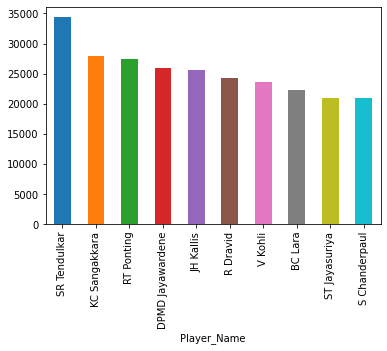

In [72]:
final_df.groupby('Player_Name')['Runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color=sns.color_palette())

### Players with most International centuries

In [70]:
final_df[(final_df['Runs']>=100)][['Player_Name','Total_Years_Played','span']].value_counts().sort_values(ascending=False).head(10).reset_index()

,Player_Name,Total_Years_Played,span,0
0,SR Tendulkar,25,1989-2013,100
1,RT Ponting,18,1995-2012,71
2,V Kohli,15,2008-2022,70
3,KC Sangakkara,16,2000-2015,63
4,JH Kallis,20,1995-2014,62
5,HM Amla,16,2004-2019,55
6,DPMD Jayawardene,19,1997-2015,54
7,BC Lara,18,1990-2007,53
8,R Dravid,17,1996-2012,48
9,AB de Villiers,15,2004-2018,47


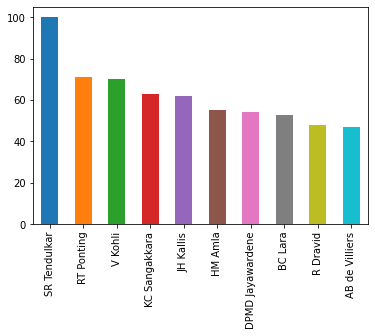

In [71]:
final_df[(final_df['Runs']>=100)]['Player_Name'].value_counts().head(10).plot(kind='bar',color=sns.color_palette())

### Top 15 players who scored most half-centuries

In [73]:
final_df[(final_df['Runs']>=50) & (final_df['Runs']<100)][['Player_Name','Total_Years_Played','span']].value_counts().sort_values(ascending=False).head(10).reset_index()

,Player_Name,Total_Years_Played,span,0
0,SR Tendulkar,25,1989-2013,164
1,KC Sangakkara,16,2000-2015,153
2,JH Kallis,20,1995-2014,149
3,R Dravid,17,1996-2012,146
4,RT Ponting,18,1995-2012,146
5,DPMD Jayawardene,19,1997-2015,136
6,Inzamam-ul-Haq,17,1991-2007,129
7,S Chanderpaul,22,1994-2015,125
8,V Kohli,15,2008-2022,122
9,BC Lara,18,1990-2007,111


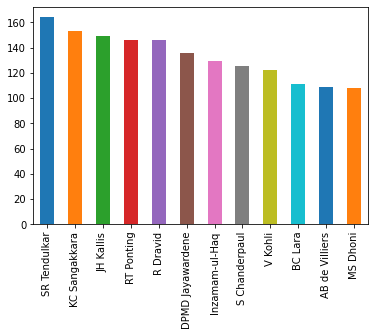

In [74]:
final_df[(final_df['Runs']>=50) & (final_df['Runs']<100)]['Player_Name'].value_counts().head(12).plot(kind='bar',color=sns.color_palette())

In [75]:
# Number of instances where batsman scored a double century but not a triple century

final_df[(final_df['Runs']>=200) & (final_df['Runs']<300)].shape[0]

258

### Top 15 players with most scores of 200+

In [76]:
final_df[(final_df['Runs']>=200)]['Player_Name'].value_counts().head(14).reset_index()

,index,Player_Name
0,KC Sangakkara,11
1,BC Lara,9
2,V Kohli,7
3,DPMD Jayawardene,7
4,SR Tendulkar,7
5,V Sehwag,7
6,RT Ponting,6
7,Younis Khan,6
8,MS Atapattu,6
9,R Dravid,5


### Players scoring 300+ runs

In [77]:
final_df[(final_df['Runs']>=300)].drop(labels=['Day','month'],axis=1).sort_values(by='Runs',ascending=False)['Player_Name'].value_counts().reset_index()

,index,Player_Name
0,BC Lara,2
1,CH Gayle,2
2,V Sehwag,2
3,Inzamam-ul-Haq,1
4,BB McCullum,1
5,KK Nair,1
6,HM Amla,1
7,Younis Khan,1
8,KC Sangakkara,1
9,MJ Clarke,1


### Players who have scored 400 or more runs in an innings

In [78]:
final_df[final_df['Runs']>=400]

,Runs,Mins,BF,4s,6s,SR,Inns,Ground,Player_Name,Team,situation_of_player,Format,Opponent Team,year,Day,month,Total_Years_Played,span
129960,400,778,582,43,4,68.72,1,St John's,BC Lara,WI,not out,Test,England,2004,Saturday,April,18,1990-2007


#### Only BRIAN LARA has scored 400 runs in an innings in international cricket

### Top 10 players who have played for the most number of years

In [79]:
final_df.groupby('Player_Name')[['Total_Years_Played','span']].first().sort_values(by='Total_Years_Played',ascending=False).head(10).reset_index()

,Player_Name,Total_Years_Played,span
0,SR Tendulkar,25,1989-2013
1,SC Williams,24,1994-2022
2,ST Jayasuriya,23,1989-2011
3,Shoaib Malik,23,1999-2021
4,CH Gayle,22,1999-2021
5,Shahid Afridi,22,1996-2018
6,S Chanderpaul,22,1994-2015
7,JM Anderson,21,2002-2022
8,PA de Silva,20,1984-2003
9,SR Waugh,20,1985-2004


### Number of instances when the players have missed scoring century by 1 run

In [80]:
final_df[final_df['Runs']==99]['Player_Name'].nunique()

91

### Number of instances when the players have missed scoring half-century by 1 run

In [81]:
final_df[final_df['Runs']==49]['Player_Name'].nunique()

380

### Number of instances when the players have missed scoring double century by 1 run

In [82]:
final_df[final_df['Runs']==199]['Player_Name'].nunique()


14

### Number of instances when the players have missed scoring triple century by 1 run

In [83]:
final_df[final_df['Runs']==299]

,Runs,Mins,BF,4s,6s,SR,Inns,Ground,Player_Name,Team,situation_of_player,Format,Opponent Team,year,Day,month,Total_Years_Played,span
171126,299,610,523,29,3,57.17,3,Wellington,MD Crowe,NZ,out,Test,Sri Lanka,1991,Thursday,January,14,1982-1995


#### MD Crowe of New Zealand is the only player who got out on 299.

###	Top 15 teams who played most international matches

In [84]:
final_df['Team'].value_counts().sort_values(ascending=False).head(15).index

Index(['AUS', 'INDIA', 'ENG', 'PAK', 'WI', 'SL', 'NZ', 'SA', 'ZIM', 'BAN',
       'IRE', 'AFG', 'SCOT', 'KENYA', 'NED'],
      dtype='object')

### Best individual score of each player

In [85]:
final_df.groupby('Player_Name')['Runs'].max().sort_values(ascending=False)

Player_Name
BC Lara             400
ML Hayden           380
DPMD Jayawardene    374
ST Jayasuriya       340
DA Warner           335
                   ... 
M Gherasim            0
Aman Ali              0
Shohidul Islam        0
S Mohan               0
R Brar                0
Name: Runs, Length: 4304, dtype: int64

### Best score on each ground

In [98]:
final_df.groupby('Ground')['Runs'].max()

Ground
Aberdeen      166
Abu Dhabi     278
Adelaide      335
Ahmedabad     275
Al Amerat     173
             ... 
Waterloo      100
Wellington    302
Whangarei     146
Windhoek      101
Worcester     105
Name: Runs, Length: 224, dtype: int64

### Teams who have played international matches

In [99]:
final_df['Opponent Team'].nunique()

91

In [100]:
final_df['Opponent Team'].unique()

array(['England', 'Netherlands', 'South Africa', 'Bangladesh', 'India',
       'Pakistan', 'West Indies', 'Australia', 'Sri Lanka', 'Afghanistan',
       'Ireland', 'Zimbabwe', 'Namibia', 'Scotland', 'Canada', 'Kenya',
       'New Zealand', 'Malaysia', 'Nepal', 'P.N.G.', 'U.A.E.', 'Bermuda',
       'Singapore', 'Hong Kong', 'Oman', 'Estonia', 'Denmark', 'Sweden',
       'Spain', 'Finland', 'Isle of Man', 'Cyprus', 'Belize', 'Cayman Is',
       'Bahamas', 'Argentina', 'Panama', 'U.S.A.', 'Philippines',
       'Maldives', 'Bhutan', 'Kuwait', 'Qatar', 'Thailand', 'Bahrain',
       'Jersey', 'Nigeria', 'Austria', 'World-XI', 'ICC World XI',
       'Germany', 'Hungary', 'Belgium', 'Czech Rep.', 'Luxembourg',
       'Romania', 'Turkey', 'Italy', 'Norway', 'France', 'Guernsey',
       'Malta', 'Bulgaria', 'Gibraltar', 'Portugal', 'Switzerland',
       'Saudi Arabia', 'Iran', 'Uganda', 'Botswana', 'Ghana', 'Serbia',
       'Greece', 'Vanuatu', 'Samoa', 'Tanzania', 'Seychelles',
       'Swazila

#### The teams like 'ICC World XI','World-XI', 'Africa XI', 'Asia XI','ASIA','ICC' are not country teams. Sometimes such teams are created with players from different countries to play charity or friendly matches.

### Function to count the number of times a player was not out or did not bat

In [105]:
def notout_count(player):
    x=final_df[final_df['Player_Name']==player]['situation_of_player'].value_counts()
    return x.sum(),x

In [106]:
notout_count('SR Tendulkar')

(811, out        708
 not out     74
 DNB         22
 TDNB         7
 Name: situation_of_player, dtype: int64)

In [107]:
notout_count('R Dravid')

(641, out        533
 not out     72
 DNB         31
 TDNB         5
 Name: situation_of_player, dtype: int64)

## Analysis of T20I format

### Players with most 100+ scores in T20I

In [109]:
t20_match[(t20_match['Runs']>=100)][['Player_Name','Total_Years_Played','span']].value_counts().sort_values(ascending=False).head(11).reset_index()

,Player_Name,Total_Years_Played,span,0
0,RG Sharma,16,2007-2022,4
1,GJ Maxwell,11,2012-2022,3
2,C Munro,9,2012-2020,3
3,CH Gayle,22,1999-2021,2
4,AJ Finch,12,2011-2022,2
5,BB McCullum,15,2002-2016,2
6,MJ Guptill,14,2009-2022,2
7,S Davizi,4,2019-2022,2
8,KL Rahul,9,2014-2022,2
9,Muhammad Waseem,2,2021-2022,2


### Players with most 50+ scores in T20I

In [110]:
t20_match[(t20_match['Runs']>=50) & (final_df['Runs']<100)][['Player_Name','Total_Years_Played','span']].value_counts().sort_values(ascending=False).head(10).reset_index()

,Player_Name,Total_Years_Played,span,0
0,V Kohli,15,2008-2022,30
1,Babar Azam,8,2015-2022,26
2,RG Sharma,16,2007-2022,26
3,DA Warner,14,2009-2022,22
4,PR Stirling,15,2008-2022,20
5,MJ Guptill,14,2009-2022,20
6,AJ Finch,12,2011-2022,17
7,KL Rahul,9,2014-2022,16
8,JC Buttler,12,2011-2022,15
9,KS Williamson,13,2010-2022,14


### Top 10 players with highest runs aggregate in T20I

In [111]:
t20_match.groupby(['Player_Name','Total_Years_Played','span'])['Runs'].sum().sort_values(ascending=False).reset_index().head(10)


,Player_Name,Total_Years_Played,span,Runs
0,RG Sharma,16,2007-2022,3313
1,MJ Guptill,14,2009-2022,3299
2,V Kohli,15,2008-2022,3296
3,AJ Finch,12,2011-2022,2855
4,PR Stirling,15,2008-2022,2776
5,Babar Azam,8,2015-2022,2686
6,DA Warner,14,2009-2022,2684
7,Mohammad Hafeez,16,2003-2021,2514
8,EJG Morgan,17,2006-2022,2458
9,Shoaib Malik,23,1999-2021,2435


In [112]:
t20_match['4s']=t20_match['4s'].astype(int)
t20_match['6s']=t20_match['6s'].astype(int)

### Most number of sixes hit by players (Top 10)

In [113]:
t20_match.groupby('Player_Name')['6s'].sum().sort_values(ascending=False).head(10).reset_index()

,Player_Name,6s
0,MJ Guptill,165
1,RG Sharma,155
2,CH Gayle,124
3,EJG Morgan,120
4,AJ Finch,117
5,E Lewis,110
6,C Munro,107
7,DA Warner,100
8,KA Pollard,99
9,GJ Maxwell,99


### Most number of fours hit by players (Top 10)

In [114]:
t20_match.groupby('Player_Name')['4s'].sum().sort_values(ascending=False).head(10).reset_index()

,Player_Name,4s
0,PR Stirling,319
1,V Kohli,298
2,RG Sharma,293
3,MJ Guptill,287
4,AJ Finch,286
5,Babar Azam,278
6,DA Warner,268
7,Mohammad Hafeez,251
8,Mohammad Shahzad,250
9,TM Dilshan,223


## Player Profile - Analysis for each player

In [115]:
final_df['Player_Name'].unique()

array(['TWM Latham', 'WA Young', 'KS Williamson', ..., 'Randhir Singh',
       'MR Pydanna', 'RC Shukla'], dtype=object)

In [117]:
x = final_df.groupby('Player_Name')

In [118]:
def player_profile(player_name):
    v=x.get_group(player_name)
    v.replace('-',0,inplace=True)
    v=v.astype({'Runs':int,'BF':int, '4s':int, '6s':int, 'SR':float, 'Inns':int})
    print('Total runs scored in each different format:',v.groupby('Format')['Runs'].sum().reset_index())
    print('Total 4s in each different format:', v.groupby('Format')['4s'].sum())
    print('Total 6s in each different format:', v.groupby('Format')['6s'].sum())
    print(player_name,' played against',v['Opponent Team'].nunique(),' these teams',v['Opponent Team'].unique())
    print('Strike rate in each different format:' ,v.groupby('Format')['SR'].median())
    print('Strike Rate against each opponent team:',v.groupby(['Opponent Team','Format'])['SR'].median())
    print('Maximum runs againt each opponent team:',v.groupby('Opponent Team')['Runs'].max())
    print('Maximum strike rate against each Opponent Team:',v.groupby('Opponent Team')['SR'].max())
    print(v.groupby(['Opponent Team','Format'])['Runs'].sum())
    o_n(player_name)
    

In [119]:
player_profile('V Sehwag')

Total runs scored in each different format:   Format  Runs
0    ODI  8273
1   T20I   394
2   Test  8586
Total 4s in each different format: Format
ODI     1132
T20I      43
Test    1233
Name: 4s, dtype: int64
Total 6s in each different format: Format
ODI     136
T20I     16
Test     91
Name: 6s, dtype: int64
V Sehwag  played against 20  these teams ['Australia' 'Pakistan' 'England' 'South Africa' 'Afghanistan'
 'New Zealand' 'Sri Lanka' 'West Indies' 'Netherlands' 'Ireland'
 'Bangladesh' 'Hong Kong' 'Africa XI' 'Bermuda' 'Zimbabwe' 'ICC World XI'
 'Kenya' 'U.A.E.' 'Namibia' 'Scotland']
Strike rate in each different format: Format
ODI      90.90
T20I    125.00
Test     78.12
Name: SR, dtype: float64
Strike Rate against each opponent team: Opponent Team  Format
Afghanistan    T20I       80.000
Africa XI      ODI       100.000
Australia      ODI        90.185
               T20I      125.000
               Test       70.490
Bangladesh     ODI       124.260
               Test       74.900


In [120]:
player_profile('AB de Villiers')

Total runs scored in each different format:   Format  Runs
0    ODI  9577
1   T20I  1672
2   Test  8765
Total 4s in each different format: Format
ODI      840
T20I     140
Test    1024
Name: 4s, dtype: int64
Total 6s in each different format: Format
ODI     204
T20I     60
Test     64
Name: 6s, dtype: int64
AB de Villiers  played against 16  these teams ['Australia' 'India' 'Zimbabwe' 'Bangladesh' 'England' 'Pakistan'
 'Sri Lanka' 'New Zealand' 'West Indies' 'Afghanistan' 'U.A.E.' 'Ireland'
 'Netherlands' 'Scotland' 'Kenya' 'Asia XI']
Strike rate in each different format: Format
ODI      89.120
T20I    112.845
Test     48.730
Name: SR, dtype: float64
Strike Rate against each opponent team: Opponent Team  Format
Afghanistan    T20I      150.815
Asia XI        ODI       111.110
Australia      ODI        91.210
               T20I       43.750
               Test       43.260
Bangladesh     ODI        81.390
               T20I      125.485
               Test       23.750
England        